# 6- Sınıflandırma Ağaçları (CART)

## TEORİ

**Amaç, veriseti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.**

* Heterojen verisetleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

## UYGULAMA

### Verisetinin İncelenmesi ve Manipüle Edilmesi

* Kullanılan kütüphanelerin dahil edilmesi

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore', category = UserWarning)

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/diabetes.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/diabetes.csv"
diabetes = pd.read_csv(url)
df = diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info() # veriseti bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().values.any() # verisetinde bos veya eksik degerler var mı?

False

In [5]:
df['Outcome'].value_counts() # outcome degerlerinin durumu

0    500
1    268
Name: Outcome, dtype: int64

/home/mrkizmaz/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


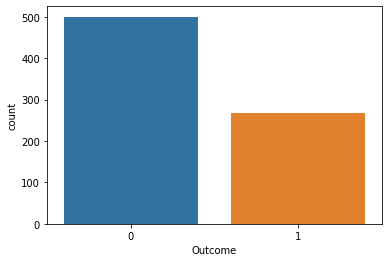

In [6]:
sns.countplot(df['Outcome']);

In [7]:
df.describe().T # verisetinin istatiksel bilgileri

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Model Kurulumu ve Tahminleme

In [8]:
X = df.drop(['Outcome'], axis = 1) # outcome dısındaki bagımsız degiskenler
y = df['Outcome'] # bagımlı degisken

# %20'i test, %80'i egitim seti
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
# model kurulumu
cart = tree.DecisionTreeClassifier().fit(X_train, y_train)
cart

DecisionTreeClassifier()

In [15]:
#!pip install SKompiler[full]
from skompiler import skompile
print(skompile(cart.predict).to('python/code')) # karar kural yapısı

((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6864999830722809 else
    0) if x[5] <= 30.949999809265137 else 1 if x[2] <= 37.0 else ((0 if x[1
    ] <= 109.5 else 1 if x[1] <= 123.0 else 0) if x[3] <= 8.5 else 1 if x[5
    ] <= 31.100000381469727 else (0 if x[7] <= 24.5 else 1) if x[5] <= 
    31.800000190734863 else 0) if x[6] <= 0.5005000084638596 else ((0 if x[
    6] <= 0.5259999930858612 else 1) if x[0] <= 1.5 else 1) if x[6] <= 
    0.5439999997615814 else (0 if x[1] <= 89.0 else 1 if x[4] <= 99.5 else 
    0 if x[5] <= 37.39999961853027 else 1) if x[2] <= 67.0 else (0 if x[1] <=
    115.5 else 1) if x[7] <= 21.5 else 0) if x[7] <= 28.5 else (1 if x[5] <=
    9.649999618530273 else 0) if x[5] <= 26.350000381469727 else (1 if x[1] <=
    28.5 else 0 if x[0] <= 9.5 else 0 if x[3] <= 27.0 else 1 if x[3] <= 
    36.0 else 0) if x[1] <= 94.5 else (((((0 if x[2] <= 55.0 else 0 if x[6] <=
    0.10449999943375587 else 1) if x[0] <= 7.5 else (0 if x[6] <= 
    0.2650000005960464

In [21]:
X.head() # bagımsız degiskenler

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
x = [6, 150, 60, 35, 90, 25.3, 1.122, 33] # degerleri icin y ne olur?

In [23]:
((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 0 if x[3] <= 40.5 else 1) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 0 if x[3] <= 14.5 else 1) if x[5] <= 
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (0 if x[1] <= 133.0 else (1 if x[0] <= 6.5 else 0) if x[1] <= 135.0 else
    0) if x[2] <= 94.0 else 1 if x[5] <= 12.0 else 0) if x[5] <= 
    26.949999809265137 else (1 if x[1] <= 28.5 else 0 if x[0] <= 9.5 else 0 if
    x[1] <= 80.0 else 1 if x[3] <= 36.0 else 0) if x[1] <= 94.5 else ((((0 if
    x[6] <= 0.24950000643730164 else 1 if x[6] <= 0.44750000536441803 else 
    0) if x[5] <= 28.34999942779541 else 1 if x[5] <= 31.15000057220459 else
    (1 if x[6] <= 0.29499999433755875 else 0) if x[7] <= 36.5 else (0 if x[
    0] <= 5.5 else 1) if x[6] <= 0.21000000089406967 else 1 if x[0] <= 9.0 else
    0 if x[6] <= 0.26500000059604645 else 1) if x[3] <= 26.5 else ((0 if x[
    3] <= 29.5 else 0 if x[6] <= 0.19299999624490738 else 1) if x[2] <= 
    67.0 else 0 if x[4] <= 155.0 else 0 if x[2] <= 76.0 else 1) if x[1] <= 
    127.5 else (1 if x[5] <= 29.399999618530273 else 0) if x[3] <= 31.0 else
    1) if x[2] <= 83.0 else ((0 if x[3] <= 39.5 else 1 if x[2] <= 87.0 else
    0) if x[5] <= 41.19999885559082 else 1) if x[4] <= 124.0 else 0 if x[3] <=
    19.5 else 1) if x[6] <= 0.527999997138977 else ((((0 if x[2] <= 76.0 else
    1) if x[1] <= 108.5 else 1) if x[1] <= 132.0 else 0) if x[5] <= 
    29.09999942779541 else 0 if x[7] <= 50.0 else 1) if x[5] <= 
    31.600000381469727 else ((1 if x[2] <= 87.0 else 0 if x[7] <= 31.5 else
    1) if x[3] <= 54.5 else 0) if x[6] <= 1.1489999890327454 else 1 if x[7] <=
    36.0 else 0) if x[1] <= 154.5 else (1 if x[5] <= 25.350000381469727 else
    0 if x[6] <= 0.3684999942779541 else (0 if x[6] <= 0.9229999780654907 else
    1) if x[3] <= 16.5 else 1) if x[5] <= 28.700000762939453 else (((((0 if
    x[2] <= 67.0 else 1) if x[4] <= 180.0 else 0) if x[4] <= 457.0 else 1) if
    x[7] <= 30.5 else 1) if x[6] <= 0.3044999986886978 else (1 if x[1] <= 
    164.5 else 0) if x[1] <= 165.5 else 1) if x[6] <= 1.4275000095367432 else
    1 if x[7] <= 28.0 else 0)


0

Sonuç = 0 çıktı. Bu yüzden [6, 150, 60, 35, 90, 25.3, 1.122, 33] degerlere sahip bir birey bu modele göre hasta olmaz!

In [24]:
cart.score(X_test, y_test) # modelin anlamlılık degeri

0.7402597402597403

In [25]:
# tahminleme
y_pred = cart.predict(X_test)
skor = accuracy_score(y_test, y_pred)
skor # dogruluk skoru

0.7402597402597403

### Model Tuning

In [26]:
?cart

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        ~/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int, then 

In [27]:
# optimum parametrelerin belirlenmesi
cart_params = {"max_depth": range(1,10),
               "min_samples_split": list(range(2,50)),
               "splitter": ["best", "random"],
               "criterion": ["gini", "entropy"]}

In [28]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart,
                       cart_params,
                       cv = 10,
                       n_jobs = -1).fit(X_train, y_train)
cart_cv

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22, 23, 24, 25, 26, 27,
                                               28, 29, 30, 31, ...],
                         'splitter': ['best', 'random']})

In [29]:
cart_cv.best_params_ # optimum parametreler

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_split': 26,
 'splitter': 'random'}

In [30]:
# optimum parametreler ile model kurulumu,
cart_model = tree.DecisionTreeClassifier(criterion = 'entropy',
                                         max_depth = 7,
                                         min_samples_split = 26,
                                         splitter = 'random').fit(X_train, y_train)

cart_model

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=26,
                       splitter='random')

In [31]:
# tahminleme
y_pred = cart_model.predict(X_test)
dogSkor = accuracy_score(y_test, y_pred)
dogSkor # optimum dogruluk skoru

0.7467532467532467

In [32]:
print(classification_report(y_test, y_pred)) # sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        99
           1       0.74      0.45      0.56        55

    accuracy                           0.75       154
   macro avg       0.74      0.68      0.69       154
weighted avg       0.74      0.75      0.73       154



## SONUÇ

Bu projede, belirli değerler göz önünde bulundurularak bir kişinin hasta olup olmadığını tahmin etmek için Sınıflandırma Ağaç modeli kullanıldı.
* Modelin optimum dogruluk skoru: **0.7467532467532467**